# DataFrame의 다양한 응용
- 함수 Mapping(이거 잘쓰면 이것만 쓰게될꺼야.)
- 열 재구성
- Filtering
- 데이터프레임 합치기 등등
- 그룹연산
- Multi Index
- Pivot 테이블

### 함수 Mapping
- Series또는 DataFrame의 Data를 특정함수에 일대일 대응 시키는 과정

In [1]:
import seaborn as sns
#import pandas as pd

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# titanic 데이터셋에서 age, fare 2개의 열을 선택하여 데이터 프레임만들기
df = titanic.loc[:,['age', 'fare']]

# ten이라는 컬럼 추가하기
df['ten'] = 10

df.head()

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


In [4]:
# 사용자 함수 정의
# 함수 만드는거 중요! 만들줄 알면 엄청 편해져

def add_10(n): #10을 더하는 함수
    return n + 10

def add_two_obj(a, b):
    return a + b

In [5]:
print(add_10(10))
print(add_two_obj(10, 10))

20
20


In [6]:
# 1) 시리즈 객체에 적용 
# -> df['age']가 n값으로 들어감.(함수 파라미터의 첫번쨰 값)
sr1 = df['age'].apply(add_10)
sr1.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [7]:
# 시리즈 객체에 숫자 적용 (a, b)
# apply의 ()괄호 안에 ()를 못넣어
sr2 = df['age'].apply(add_two_obj, b=10)
sr2.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [8]:
# 람다함수 : 함수는 함순데 이름이 없는 함수.
# 단점은 함수내용이 많아지면 정신이 없어져
# 그래서 람다함수2 밑에 스타일로 많이 적음 -> 람다함수에서 함수를 받아옴.
sr3 = df['age'].apply(lambda x: x + 10)
sr3.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [9]:
# 람다함수2
# 이렇게 쓰면 좋다.
sr4 = df['age'].apply(lambda x: add_10(x))
sr4.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [10]:
# 2) DataFrame에 함수 Mapping
# 시리즈 뺴고는 전부다 applymap() 사용
df_map = df.applymap(add_10)
df_map.head()

,age,fare,ten
0,32.0,17.2500,20
1,48.0,81.2833,20
2,36.0,17.9250,20
3,45.0,63.1000,20
4,45.0,18.0500,20


In [11]:
# NaN값 확인하는 함수 만들기
def missing_vlaue(series):
    return series.isnull()

In [12]:
# 전체 적용도 apply 각각 하나하나씩 해주기 떄문에 컬럼하나있는건 시리즈적용하는 방식이라서
# applymap은 전체를 하나로 검사하는것.
df.apply(missing_vlaue)

,age,fare,ten
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,True,False,False
889,False,False,False


In [13]:
# 데이터프레임의 각 열의 최대값과 최소값의 차이를 출력

def min_max(a):
    return a.max() - a.min()

In [14]:
# df['age']라는 값은 데이터 하나의 값이라서 min max가 없다.
result = df.apply(min_max)
print(result)

age      79.5800
fare    512.3292
ten       0.0000
dtype: float64


In [15]:
# lambda 사용하여 add Column 추가하기
# 여기서의 x는 df
df['add'] = df.apply(lambda x: add_two_obj(x['age'], x['ten']), axis=1)
df.head()

,age,fare,ten,add
0,22.0,7.2500,10,32.0
1,38.0,71.2833,10,48.0
2,26.0,7.9250,10,36.0
3,35.0,53.1000,10,45.0
4,35.0,8.0500,10,45.0


---
### pipe()  사용하기

In [16]:
df = titanic.loc[:,['age','fare']]
df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [17]:
# 각 열의 NaN 찾기
def missing_vlaue(x):
    return x.isnull()

In [18]:
# 각열의 NaN 갯수 변환
def missing_count(x):
    return missing_vlaue(x).sum()

In [19]:
# 총 NaN 갯수 가져오기
def total_number_missing(x):
    return missing_count(x).sum()

In [20]:
df.pipe(missing_vlaue)

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
886,False,False
887,False,False
888,True,False
889,False,False


In [21]:
df.pipe(missing_count)

age     177
fare      0
dtype: int64

In [22]:
df.pipe(total_number_missing)

177

---
# 열 재구성

In [23]:
# titanic중 survived, pclass, sex, age 로 구성된 df 만들기
df = titanic.iloc[0:4,0:4]
df

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0


In [24]:
# 열이름의 리스트 만들기
columns = list(df.columns)
columns
type(columns)

list

In [25]:
# 현재의 열이름을 알파벳 순으로 정렬하기
columns_sorted = sorted(columns)
columns_sorted

['age', 'pclass', 'sex', 'survived']

In [26]:
df[columns_sorted]

,age,pclass,sex,survived
0,22.0,3,male,0
1,38.0,1,female,1
2,26.0,3,female,1
3,35.0,1,female,1


In [27]:
# 열의 이름을 기존 순서의 정반대 순으로 정렬하기.
columns_reversed = list(reversed(columns))
df[columns_reversed]

,age,sex,pclass,survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1


In [28]:
columns_costomed=['pclass', 'sex', 'age', 'survived']
df[columns_costomed]

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1


### 열 분리
- 하나의 열이 여러가지 정보를 담고있을떄 각 정보를 서로 분리하여 사용

In [29]:
import pandas as pd

In [30]:
df = pd.read_excel("../Data/주가데이터.xlsx")
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연월일     20 non-null     datetime64[ns]
 1   당일종가    20 non-null     int64         
 2   전일종가    20 non-null     int64         
 3   시가      20 non-null     int64         
 4   고가      20 non-null     int64         
 5   저가      20 non-null     int64         
 6   거래량     20 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 1.2 KB


In [32]:
# 년, 월, 일 데이터 분리하기
df['연월일'] = df['연월일'].astype('str')
dates = df['연월일'].str.split('-')
dates.head()

0    [2018, 07, 02]
1    [2018, 06, 29]
2    [2018, 06, 28]
3    [2018, 06, 27]
4    [2018, 06, 26]
Name: 연월일, dtype: object

In [33]:
# dates는 시리즈(1차원 데이터)라서 loc(2차원)로 뽑아 올수 없다
# dates[0][0]
dates.str.get(0)

0     2018
1     2018
2     2018
3     2018
4     2018
5     2018
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2018
13    2018
14    2018
15    2018
16    2018
17    2018
18    2018
19    2018
Name: 연월일, dtype: object

In [34]:
type(dates)

pandas.core.series.Series

In [35]:
df['연'] = dates.str.get(0)
df['월'] = dates.str.get(1)
df['일'] = dates.str.get(2)
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연,월,일
0,2018-07-02,10100,600,10850,10900,10000,137977,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018,06,26


---
# Filtering
- 특정 조건식을 만족하는 Data만 따로 추출하는 방법
- True False값을 추출해서 쓰는 방식들

In [36]:
# 나이가 10대(10~19)인 승객만 따로 선택

mask1 = ( titanic.age >= 10) &  (titanic.age < 20)
df_teenage= titanic.loc[mask1, :]
df_teenage.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


In [37]:
# 나이가 10세 미만 (0~9세)이고 여성인 승객만 따로 선택
mask2 = (titanic.age < 10) &  (titanic.sex == 'female')
df_female_under10 = titanic.loc[mask2,:]
df_female_under10.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False


In [38]:
# 나이가 10세미만(0~9세) 또는 60세 이상인 승객의 age, sex, along열만 선택
mask3 = (titanic.age < 10) | (titanic.age >= 60)
df_under10_morethan60 = titanic.loc[mask3,['age','sex','alone']]
df_under10_morethan60.head()

,age,sex,alone
7,2.0,male,False
10,4.0,female,False
16,2.0,male,False
24,8.0,female,False
33,66.0,male,True


### isin()

In [39]:
isin_filter = titanic['sibsp'].isin([3,4,5])
titanic[isin_filter].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False


---
### DataFrame 병합
- SQL의 Join과 비슷한 방식으로 어떤 기준에 의해 병합하는 개념
- 이떄 기준이 되는 열이나 index를 Key라고 한다.
- Key가 되는 열이나 index는 반드시 양쪽 DataFram에 존재 해야 한다.
- merge는 결론적으로 ERD에서의 Relation임.. 릴레이션

In [40]:
# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel("../Data/stock price.xlsx")
df1.head()

,id,stock_name,value,price
0,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200


> id : 종목코드  
> stock_name : 회사 이름  
> value : 시가 총액  
> price : 주가  

In [41]:
# 주식 데이터를 가져와서 데이터프레임 만들기
df2 = pd.read_excel("../Data/stock valuation.xlsx")
df2.head()

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627


> id : 종목코드  
> name : 회사 이름  
> eps : 주당 순이익  
> bps : 주당 순자산가치  
> per : 주가 수익비율  
> pbr : 주가 자산비율

In [42]:
# 데이터 프레임 합치기 - 교집합
merge_inner = pd.merge(df1, df2, on='id')
merge_inner.head()

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [43]:
# 데이터 프레임 합치기 - 합집합
merge_outer = pd.merge(df1, df2, on='id', how='outer')
merge_outer.head()

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN


In [44]:
# 데이터 프레임 합치기 - 왼쪽데이터 프레임 기준, 기준값은 회사명
merge_left = pd.merge(df1, df2, left_on='stock_name',right_on='name', how='left')
merge_left.head()

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,130960.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500,139480.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# 데이터 프레임 합치기 - 오른쪽데이터 프레임 기준, 기준값은 회사명
merge_right = pd.merge(df1, df2, left_on='stock_name',right_on='name', how='right')
merge_right.head()

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,130960.0,CJ E&M,58540.666667,98900.0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,NaN,NaN,NaN,NaN,136480,하림,274.166667,3551,11.489362,0.887074
2,NaN,NaN,NaN,NaN,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480.0,이마트,239230.833333,254500.0,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990.0,삼양사,82750.000000,82000.0,145990,삼양사,5741.000000,108090,14.283226,0.758627


In [46]:
# df1에서 price가  50000미만인 데이터 찾기
# df가 따로 하나가 만들어진거임
price = df1[df1['price'] < 50000]
price.head()

,id,stock_name,value,price
2,138250,엔에스쇼핑,14558.666667,13200
4,142280,녹십자엠에스,468.833333,10200
9,204210,모두투어리츠,3093.333333,3475


In [47]:
# 서로다른 데이터중에 같은 키값을 가지고 비교할때 쓰는경우 merge를 많이 사용한다.
value = pd.merge(price, df2)
value

,id,stock_name,value,price,name,eps,bps,per,pbr
0,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [48]:
value.drop('name', axis=1, inplace=True)
value

,id,stock_name,value,price,eps,bps,per,pbr
0,204210,모두투어리츠,3093.333333,3475,85.166667,5335,40.802348,0.651359


---
# 그룹 연산
- 복잡한 데이터를 이떤 기준에 따라 여러그춥으로 나눠서 관찰하는 것도 좋은 방법이다.
- 특정 기준을 적용하여 몇개의 그룸으로 분활하여 처리하는 과정이 그룹 연산이다.
- 1단계 : 분할(split) -> 데이터를 특정 조건에 의해 분할
- 2단계 : 적용(apply) -> 데이터를 집계, 병환, 필터링
- 3단계 : 결합(combin) -> 2단계 처리 결과를 하나로 결합
- 무조건 하게 됨

### 그룹 객체 만들기 (분할 단계)

In [49]:
df = titanic.loc[:,['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [50]:
# class열을 기준으로 분할을 할꺼야
# Categories 를 범주형으로 만들수 있다.
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [51]:
grouped = df.groupby(['class'])
list(grouped)

[('First',
        age     sex  class     fare  survived
  1    38.0  female  First  71.2833         1
  3    35.0  female  First  53.1000         1
  6    54.0    male  First  51.8625         0
  11   58.0  female  First  26.5500         1
  23   28.0    male  First  35.5000         1
  ..    ...     ...    ...      ...       ...
  871  47.0  female  First  52.5542         1
  872  33.0    male  First   5.0000         0
  879  56.0  female  First  83.1583         1
  887  19.0  female  First  30.0000         1
  889  26.0    male  First  30.0000         1
  
  [216 rows x 5 columns]),
 ('Second',
        age     sex   class     fare  survived
  9    14.0  female  Second  30.0708         1
  15   55.0  female  Second  16.0000         1
  17    NaN    male  Second  13.0000         1
  20   35.0    male  Second  26.0000         0
  21   34.0    male  Second  13.0000         1
  ..    ...     ...     ...      ...       ...
  866  27.0  female  Second  13.8583         1
  874  28.0  female

> 리스트 안에 [(data1,data2),(data1,data2),(data1,data2)]데이터가 2개가 있는거  
> 리스트 안에 튜플이 들어와있는 형태

In [52]:
# 그룹객체를 iteration(데이터가 쌓여있는것 list와 비슷)으로 출력 : 처음부터 5줄만 출력
for key, group in grouped:
    print("*key :", key)
    print("*number :",len(group))
    print(group.head())
    print("=" * 45,key,"end")

*key : First
*number : 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
============================================= First end
*key : Second
*number : 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
============================================= Second end
*key : Third
*number : 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0
===============================

In [53]:
# get_group('키값')
grouped.get_group('Third').head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0


In [54]:
g3 = grouped.get_group('Third').head()
type(g3)

pandas.core.frame.DataFrame

In [55]:
# 연산 메소드 적용(그룹들의 평균내보기) 이걸로 survived의확률값 을 알수있다
# sigmoid 그래프 적용해보셨고 -> activation Function??
grouped.mean()

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [56]:
# class와 sex열을 기준으로 분할
# sex는 object 라서 category로 만들어줘야함.(3.5버전 이전엔 못썼어.)
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [57]:
# sex를 object 로 해보기
grouped_sex = df.groupby(['sex'])
list(grouped_sex)

[('female',
        age     sex   class     fare  survived
  1    38.0  female   First  71.2833         1
  2    26.0  female   Third   7.9250         1
  3    35.0  female   First  53.1000         1
  8    27.0  female   Third  11.1333         1
  9    14.0  female  Second  30.0708         1
  ..    ...     ...     ...      ...       ...
  880  25.0  female  Second  26.0000         1
  882  22.0  female   Third  10.5167         0
  885  39.0  female   Third  29.1250         0
  887  19.0  female   First  30.0000         1
  888   NaN  female   Third  23.4500         0
  
  [314 rows x 5 columns]),
 ('male',
        age   sex   class     fare  survived
  0    22.0  male   Third   7.2500         0
  4    35.0  male   Third   8.0500         0
  5     NaN  male   Third   8.4583         0
  6    54.0  male   First  51.8625         0
  7     2.0  male   Third  21.0750         0
  ..    ...   ...     ...      ...       ...
  883  28.0  male  Second  10.5000         0
  884  25.0  male   Thir

In [58]:
grouped_two = df.groupby(['class', 'sex'])
list(grouped_two)

[(('First', 'female'),
        age     sex  class      fare  survived
  1    38.0  female  First   71.2833         1
  3    35.0  female  First   53.1000         1
  11   58.0  female  First   26.5500         1
  31    NaN  female  First  146.5208         1
  52   49.0  female  First   76.7292         1
  ..    ...     ...    ...       ...       ...
  856  45.0  female  First  164.8667         1
  862  48.0  female  First   25.9292         1
  871  47.0  female  First   52.5542         1
  879  56.0  female  First   83.1583         1
  887  19.0  female  First   30.0000         1
  
  [94 rows x 5 columns]),
 (('First', 'male'),
        age   sex  class      fare  survived
  6    54.0  male  First   51.8625         0
  23   28.0  male  First   35.5000         1
  27   19.0  male  First  263.0000         0
  30   40.0  male  First   27.7208         0
  34   28.0  male  First   82.1708         0
  ..    ...   ...    ...       ...       ...
  839   NaN  male  First   29.7000         1
  8

In [59]:
# 그룹객체를 iteration(데이터가 쌓여있는것 list와 비슷)으로 출력 : 처음부터 5줄만 출력
for key, group in grouped_two:
    print("*key :", key)
    print("*number :",len(group))
    print(group.head())
    print("=" * 45,key,"end")

*key : ('First', 'female')
*number : 94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1
============================================= ('First', 'female') end
*key : ('First', 'male')
*number : 122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0
============================================= ('First', 'male') end
*key : ('Second', 'female')
*number : 76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29

In [60]:
grouped_two.mean()

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [61]:
# grouped_two에서 Thrid의 female만 group3f라는 dataframe 만들기
# 튜플 뽑아오는법
grouped_two.get_group(('Third','female')).head()

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0


---
### 그룹 연산 메소드 (적용 - 결합)
- 집계 기능의 기본함수
> mean(), max(), min(), sum(), count(), size(), var(), describe(), info(), first(), late() ....

In [62]:
list(grouped)

[('First',
        age     sex  class     fare  survived
  1    38.0  female  First  71.2833         1
  3    35.0  female  First  53.1000         1
  6    54.0    male  First  51.8625         0
  11   58.0  female  First  26.5500         1
  23   28.0    male  First  35.5000         1
  ..    ...     ...    ...      ...       ...
  871  47.0  female  First  52.5542         1
  872  33.0    male  First   5.0000         0
  879  56.0  female  First  83.1583         1
  887  19.0  female  First  30.0000         1
  889  26.0    male  First  30.0000         1
  
  [216 rows x 5 columns]),
 ('Second',
        age     sex   class     fare  survived
  9    14.0  female  Second  30.0708         1
  15   55.0  female  Second  16.0000         1
  17    NaN    male  Second  13.0000         1
  20   35.0    male  Second  26.0000         0
  21   34.0    male  Second  13.0000         1
  ..    ...     ...     ...      ...       ...
  866  27.0  female  Second  13.8583         1
  874  28.0  female

In [63]:
# 표준편차 구하기
std_all = grouped.std()
std_all

,age,fare,survived
class,,,
First,14.802856,78.380373,0.484026
Second,14.001077,13.417399,0.500623
Third,12.495398,11.778142,0.428949


In [64]:
grouped.fare.std()

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

In [65]:
# 함수기능 넣기
def min_max(x):
    return x.max() - x.min()

In [66]:
grouped.agg(min_max)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


In [67]:
# 각 컬럼별 min, max 보기
grouped.agg(['min','max'])

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [68]:
# 각 컬럼별 서로다른 값 보기
grouped.agg({'fare':['min','max'], 'age':'mean'})

fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620

# 서울시 CCTV현황 분석 및 인구 현황 분석

## CCTV 설치 현황

In [69]:
import pandas as pd

In [70]:
CCTV_Seoul = pd.read_excel("../Data/CCTV_in_Seoul_2018.xlsx")
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [71]:
CCTV_Seoul.tail()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [72]:
# CCTV_Seoul의 첫번째 컬럼 이름 확인
CCTV_Seoul.columns[0]

'기관명'

In [73]:
# 기관명 -> 구별 로 변경 (Column이름 변경)
CCTV_Seoul.rename(columns={'기관명' : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [74]:
# NaN을 확인하고 NaN을 0으로 대체하기
print(CCTV_Seoul.isnull().sum())
CCTV_Seoul = CCTV_Seoul.fillna(0)


구별          0
소계          0
2011년 이전    2
2012년       2
2013년       2
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64


In [75]:
print(CCTV_Seoul.isnull().sum())

구별          0
소계          0
2011년 이전    0
2012년       0
2013년       0
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
dtype: int64


### CCTV 현황

In [76]:
# CCTV에서 소계로 오름차순 정렬
CCTV_Seoul.sort_values(by ='소계', ascending=True).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


> CCTV갯수가 적은 지역으로는 도봉구, 중랑구, 강북구, 종로구, 중구 순이다

In [77]:
# CCTV에서 소계로 내림차순 정렬
CCTV_Seoul.sort_values(by ='소계', ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


> CCTV갯수가 많은 지역으로는 강남구, 관악구, 구로구, 성북구, 은평구 순이다

#### 최근 3년간 CCTV증가율 구해서 CCTV가 제일 많이 증가한 구를 검색

In [78]:
sum_all = CCTV_Seoul.iloc[:,2:7].sum(axis=1) # ~ 15 년도의 합
sum = CCTV_Seoul.iloc[:,7:].sum(axis=1) # 16 ~ 18 년도의 합
CCTV_Seoul['최근증가율'] = (sum / sum_all) *100
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425


In [79]:
# CCTV에서 최근증가율로 내림차순 정렬
CCTV_Seoul.sort_values(by ='최근증가율', ascending=False, inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


> 결과를 보면 최근 3년간의 CCTV가 2015년 이전에 비해 가장 많이 증가한곳은 중구, 영등포구, 성동구, 금천구, 광진구 순이다.

---
# 인구현황 데이터

In [80]:
population_in_Seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx", header=3)
# Column 이름부터 0으로 카운트 해서 
population_in_Seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
1,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
2,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794
3,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
4,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728


In [81]:
# 데이터로 사용할 Column 뽑아오기
population = population_in_Seoul.iloc[:,[1,3,6,9,13]]
population.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [82]:
# 선생님 버전
# usecols="B, D, G, J, N" 이건 엑셀이라 있는것임.
pop_Seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx",
                            header=3,
                            usecols="B, D, G, J, N"
            )
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [83]:
# Column이름 바꾸기
pop_Seoul.columns = ['구별','인구수','한국인','외국인','고령자']
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [84]:
# 합계 행 지우기 (drop사용)
pop_Seoul.drop(0, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [85]:
# 구별 Data의 유효성 확인
len(pop_Seoul['구별'].unique())

25

#### 외국인 비율, 고령자 비율 Column 추가하기

In [86]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [87]:
# 인구수가 제일 많은 지역은 Top5
pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


> 인구수가 가장 많은 지역은 송파구, 강서구, 강남구, 노원구, 관악구이다

In [88]:
# 외국인이 제일 많은 지역은 Top5
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


> 외국인수가 가장 많은 지역은 영등포구, 구로구, 금천구, 관악구, 동대문구 이다

In [89]:
# 외국인이 비율이 높은 지역은 Top5
pop_Seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251
17,구로구,438308,405837,32471,67432,7.408261,15.384615
3,용산구,246165,229579,16586,39439,6.737757,16.021368


> 외국인수비율이 가장 많은 지역은 영등포구, 중구, 금천구, 구로구, 용산구 이다  
> 중구는 외교부가 있는곳이라 다른 외국인이랑 다름~

In [90]:
# 고령자 정렬
pop_Seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


> 고령자가 가장 많은 지역은 송파구, 강서구, 노원구, 은평구, 관악구 순이다.

In [91]:
# 고령자 비율 정렬
pop_Seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


> 고령자비율 가장 많은 지역은 강북구, 도봉구, 중구, 종로구, 은평구 순이다.

In [92]:
pop_Seoul.sort_values(by='한국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [93]:
#pop_Seoul

In [94]:
#pop_Seoul.iloc[:,2:5].sum(axis=1)


In [95]:
# pop_Seoul['고령자한국인비율'] = pop_Seoul['고령자'] / pop_Seoul['한국인'] * 100
# pop_Seoul.head()

In [96]:
# pop_Seoul.sort_values(by='고령자한국인비율', ascending=False).head()

3조
> 영등포구가 외국인인구수, 외국인 비율이 가장 높게 나타나는 경향을 보인다.      
> 영등포구, 금천구, 구로구는 외국인 인구수와 외국인비율이 높게 나타나는 경향을 보인다.
> 은평구를 제외한 나머지 구는 고령자인구와 고령자비율이 비례하지 않는다.      
> 인구수가 많은 상위 다섯개 구 중에 4개의 구가 고령자수가 높게 나타나는 경향을 보인다.(즉 인구수와 고령자수는 비례관계를 보인다.)            
> 고령자 비율은 강북지역이 높다.      
> 인구수 상위 5개 지역구 중 4군데가 강남지역이다.


인구수가 제일 많은 지역은 송파구 이지만 영등포구가 제일 외국인이 많다.  
그리고 그 근처라고 할 수 있는 구로구, 금천구 등도 굉장히 외국인이 많다.(지역하고도 관련이 있다.)  
송파구는 고령자가 제일 많지만 고령자의 비율이 높지 않은것이 확인된다.  
하지만 강북구, 도봉구, 종로구, 은평구 같은 경우는   
인구수 대비 고령자 비율이 많기 때문에 추후 '고령화'가 우려된다.(현황을 예기해주고 -> 추후를 고려해야함.)  

---
# CCTV와 인구현황 합치기

In [97]:
# 데이터 병합
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998,136469,126175,10294,23794,7.543105,17.435462
1,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378,404766,371903,32863,59373,8.119012,14.668475
2,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681,307193,299042,8151,44728,2.653381,14.560228
3,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745,251370,232583,18787,38508,7.473843,15.319251
4,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295,365990,350417,15573,48989,4.255034,13.385338


In [98]:
# 컬럼 추출
delColumn = data_result.columns[2:10]

for i in delColumn:
    del data_result[i]
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462
1,영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475
2,성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228
3,금천구,1634,112.483745,251370,232583,18787,38508,7.473843,15.319251
4,광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338


In [99]:
# index 이름 구별로 바꾸기
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462
영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228
금천구,1634,112.483745,251370,232583,18787,38508,7.473843,15.319251
광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338


In [100]:
import numpy as np

In [101]:
# 고령자 비율과 소계의 상관계수
np.corrcoef(data_result.고령자비율, data_result.소계)

# > 역상관 관계 -> 젊은층 많은데에 CCTV가 많다

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [102]:
# 고령자 와 소계의 상관계수
np.corrcoef(data_result.고령자, data_result.소계)

array([[1.        , 0.28638538],
       [0.28638538, 1.        ]])

In [103]:
# 외국인 비율과 소계의 상관계수
np.corrcoef(data_result.외국인비율, data_result.소계)

# > 역상관 관계

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [104]:
# 외국인과 소계의 상관계수
np.corrcoef(data_result.외국인, data_result.소계)

array([[1.        , 0.17444235],
       [0.17444235, 1.        ]])

In [105]:
# 인구수 비율과 소계의 상관계수
np.corrcoef(data_result.인구수, data_result.소계)

# > 인구수가 많으면 CCTV가 늘어나는 경향을 보인다

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

> 고령자 비울의 상관계수를 보면 역상관이 발생하고 이는 고령자가 아닌 젊은층 비율이 높은 곳에 CCTV가 많이 설치되는 경향을 보이며  
> 주로 인구수와 양의 상관을 보이고 있어 CCTV 댓수는 인구수에 비례하여 증가하는 경향을 보인다.

---
# 시각화

In [106]:
# import matplotlib.pyplot as plt 랑 똑같이 불러오는 방법 밑에꺼는 옛날꺼
from matplotlib import pyplot as plt #이렇게 써있는 소스는 오래된것

# Warning무시
import warnings
warnings.filterwarnings('ignore')

In [107]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [108]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462
영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228
금천구,1634,112.483745,251370,232583,18787,38508,7.473843,15.319251
광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338


In [109]:
# 파일로 저장(CCTV_Result.csv) # index False로 하면 구별이 다 날라감.
data_result.to_csv("../Data/CCTV_Result.csv")

In [110]:
pd.read_csv("../Data/CCTV_Result.csv", index_col=0).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462
영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228
금천구,1634,112.483745,251370,232583,18787,38508,7.473843,15.319251
광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338


In [111]:
data1 = data_result.sort_values(by='소계', ascending=True)['소계']
data1.head()

구별
도봉구     858
중랑구    1068
강북구    1265
종로구    1471
중구     1544
Name: 소계, dtype: int64

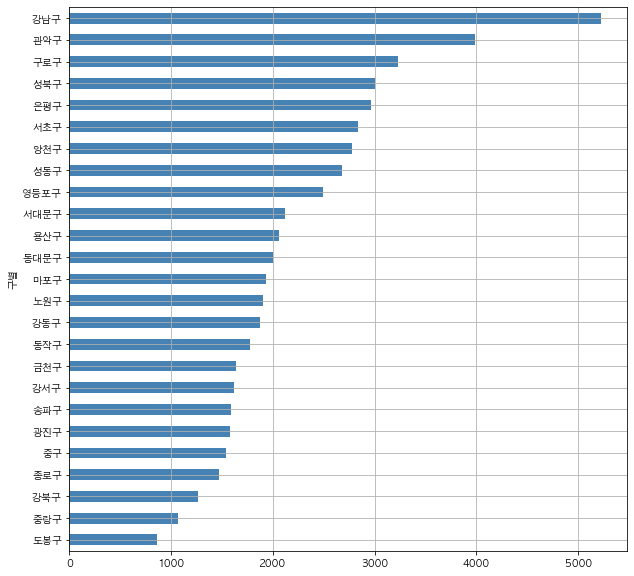

In [112]:
plt.rcParams['figure.figsize'] = (10 , 10)
# data1 = data_result['소계'].sort_valus()
data1.plot(
    kind = 'barh',
    color = 'steelblue',
    grid = True
)
plt.show()

### 인구대비 CCTV 비율 (이걸 증명해야 함) 막대그래프로 그리기

In [113]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462
영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228
금천구,1634,112.483745,251370,232583,18787,38508,7.473843,15.319251
광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338


In [114]:

data2 = (data_result.소계 / data_result.인구수) * 100
data2.sort_values().head()

구별
송파구    0.232933
도봉구    0.257275
중랑구    0.266548
강서구    0.271444
노원구    0.355932
dtype: float64

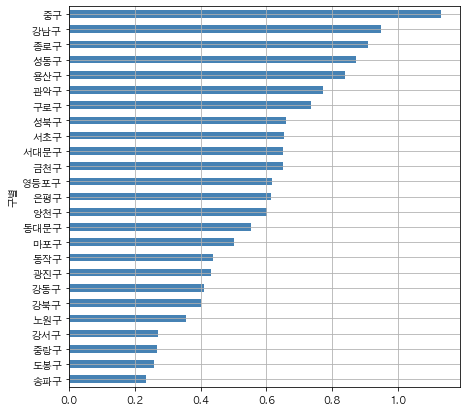

In [115]:
plt.rcParams['figure.figsize'] = (7 , 7)
# data1 = data_result['소계'].sort_valus()
data2.sort_values().plot(
    kind = 'barh',
    color = 'steelblue',
    grid = True
)
plt.show()

> 중구가 CCTV 대수는 가장 적으나 인구대비 CCTV 비율이 가장 높게 나타난다. <br>
> 강남구가 CCTV 대수가 가장 높게 나타나고 비율 또한 2번째로 가장 높게 나타난다. <br>
> 강북구, 도봉구 는 고령자비율이 가장 높지만, CCTV 비율은 밑에서 6번째, 2번째로 낮게 나타난다. <br>

In [116]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462
영등포구,2495,139.443378,404766,371903,32863,59373,8.119012,14.668475
성동구,2679,114.148681,307193,299042,8151,44728,2.653381,14.560228
금천구,1634,112.483745,251370,232583,18787,38508,7.473843,15.319251
광진구,1581,111.930295,365990,350417,15573,48989,4.255034,13.385338


<Figure size 432x432 with 0 Axes>

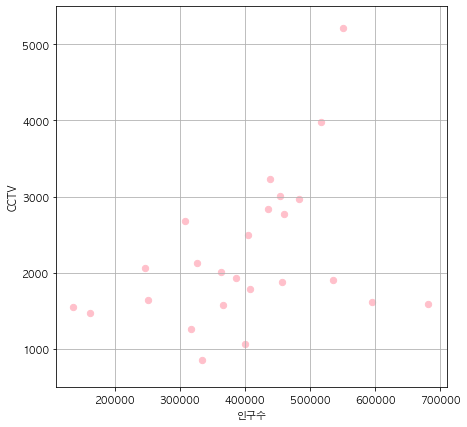

In [117]:
# 산점도를 이용한 시각화 (인구수와 소계)

plt.figure(figsize=(6,6))
data_result.plot(
    kind = 'scatter',
    x = '인구수',
    y = '소계',
    grid = True,
    s = 40,
    c = 'pink'
)
plt.ylabel('CCTV')
plt.ylim(500, 5500)
plt.xlim(110000, 710000)
plt.show()

In [118]:
# 인구수, 소계에 따른 기준직선(회귀선, 평균선 만들기) -> 이거 잘쓰면 편하게 쓸수 있음(numpy에 있는 기능임)
#np.polyfit(data1, data2, 차원)
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1  )
fp1

array([2.88522756e-03, 1.06403852e+03])

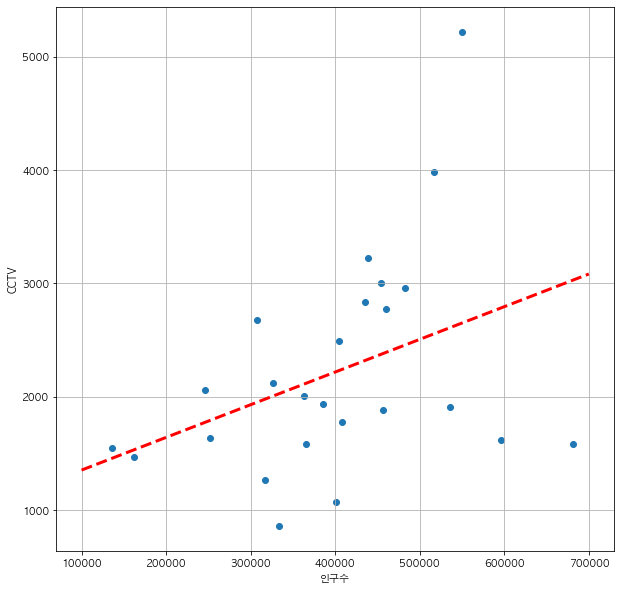

In [119]:
# x축 만들기 : 인구수 표현
fx = np.linspace(100000,700000) # ylim범위 준거

# y축 데이터 만들기 : CCTV소계 표현
f1 = np.poly1d(fp1) # -> fp1의 회귀식 -> 0.002885 x + 1064

plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'])

plt.plot(fx, f1(fx), ls = 'dashed', lw=3, color = 'r') # 기준직선(=회귀선, 평균선) 그리기

plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

> 이 직선은 CCTV댓수에 기준 값이 됩니다.  
> 이 직선을 기준으로 상위에 있는 점은 과하게 설치된 것이고,  
> 직선보다 하위에 있는 점은 인구수에 비해 CCTV가 부족하다는 해석이 됩니다.

## 오차 범위 구하기

In [120]:
# 정답과 예측값의 차이 = 오차
# 오차를 만들어서 시각화하고 발표를 해야함
# poly1d 는 근사값인 직선으로 그어져
# poly2d 산포도 점들을 다 따라다녀서 과대적합이 있다.

# 기준선구하기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)

# 기준치 구하기
f1 = np.poly1d(fp1)
# fp1 => array([2.88522756e-03, 1.06403852e+03])

# 인구수
fx = np.linspace(100000, 700000) # 범위 정하기

# 소계에서 기준인구수 차이로 오차값 구하기
# 절대값 np.abs() 를 넣어줘야 - 값이안생겨서 확인및 그래프에 나타낼수 있다.
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

# 정렬
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,1165.777237


### 그래프에 텍스트와 Color를 입히자

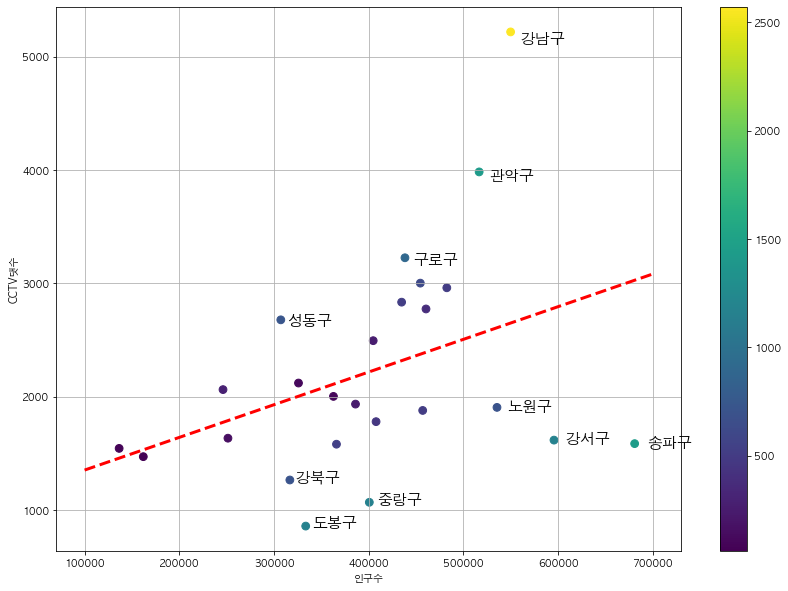

In [122]:
# 그래프에 텍스트와 Color를 입히자
plt.figure(figsize=(14, 10)) # color에 대한 범례를 넣어야해서 x축을 키움
plt.scatter(data_result['인구수'], 
                    data_result['소계'],
                    c = data_result['오차'],# color값의 기준을 잡아줌
                    s = 60,
                    )
plt.plot(fx, f1(fx), ls = 'dashed', lw=3, color = 'r') # 기준직선(=회귀선, 평균선) 그리기

# 오차가 가장큰 10개구에 텍스트 붙이기
# plt.text(500000, 3000, 'Test')
# df_sort 는 이미 정렬되어있어서 그냥 쓰는거야!
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n] * 0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('인구수')
plt.ylabel('CCTV댓수')
plt.colorbar() # 범례 컬러바 쓰겠다.
plt.grid()
plt.show()